In [2]:
# installing libraries
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataframe = pd.read_csv("/content/heart.csv")
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
rows, columns = dataframe.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 1025 rows and 14 columns in the dataset


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
dataframe.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
dataframe.describe().round(2).style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.430000,0.700000,0.940000,131.610000,246.000000,0.150000,0.530000,149.110000,0.340000,1.070000,1.390000,0.750000,2.320000,0.510000
std,9.070000,0.460000,1.030000,17.520000,51.590000,0.360000,0.530000,23.010000,0.470000,1.180000,0.620000,1.030000,0.620000,0.500000
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


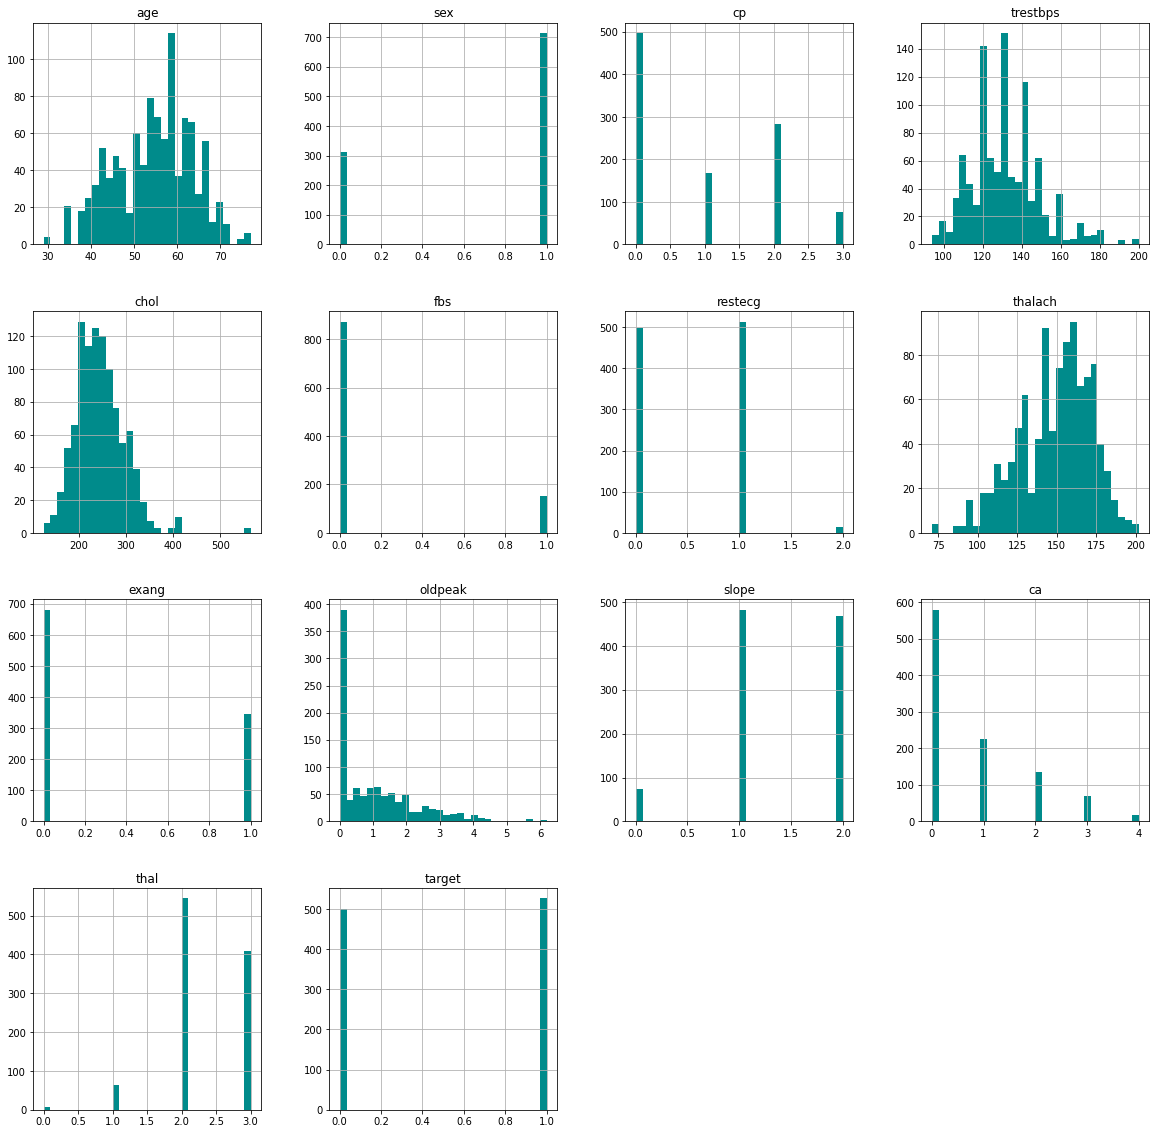

In [10]:
dataframe.hist(bins=30, layout=(4, 4), figsize=(20, 20), 
               column=dataframe.columns[0:], color="DarkCyan", 
               grid=True)
plt.show()

In [11]:
dataframe_corr = dataframe.corr()

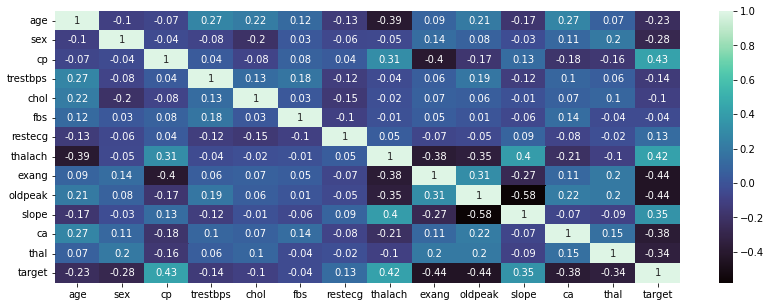

In [12]:
plt.figure(figsize=(14, 5))
sns.heatmap(round(dataframe_corr, 2), annot=True, cmap="mako")

In [13]:
features = ["thal", "ca", "slope", "restecg", "fbs", "cp", "sex", "exang"]
dataframe[features] = dataframe[features].astype(object)

In [14]:
dataframe.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [15]:
numerical_col = dataframe.select_dtypes(exclude=np.object_)
categorical_col = dataframe.select_dtypes(exclude=np.number)

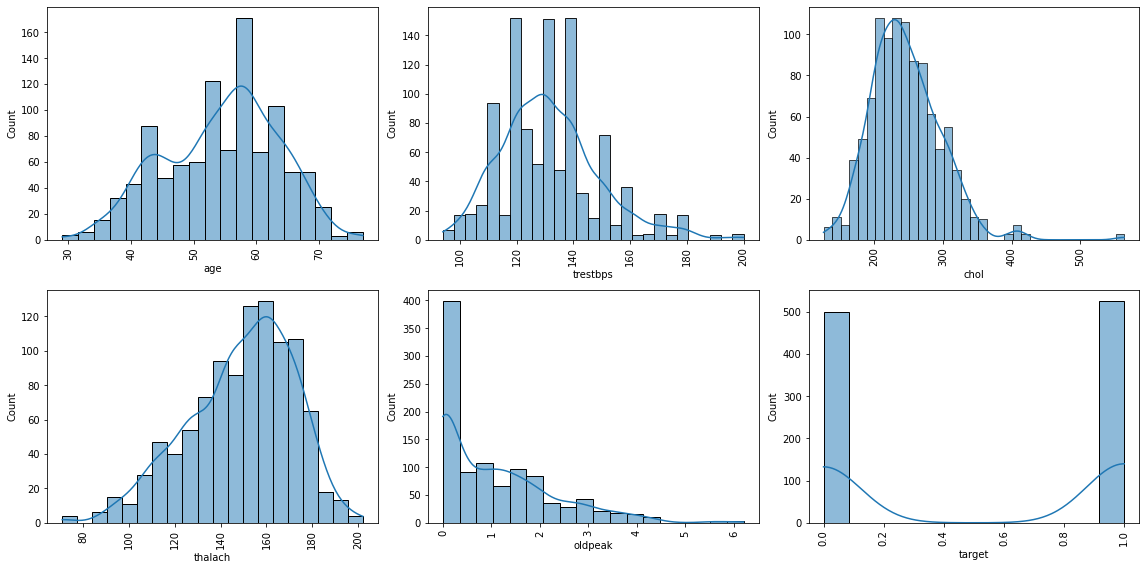

In [16]:
plt.figure(figsize=(16, 8))
for index, column in enumerate(numerical_col):
    plt.subplot(2, 3, index+1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

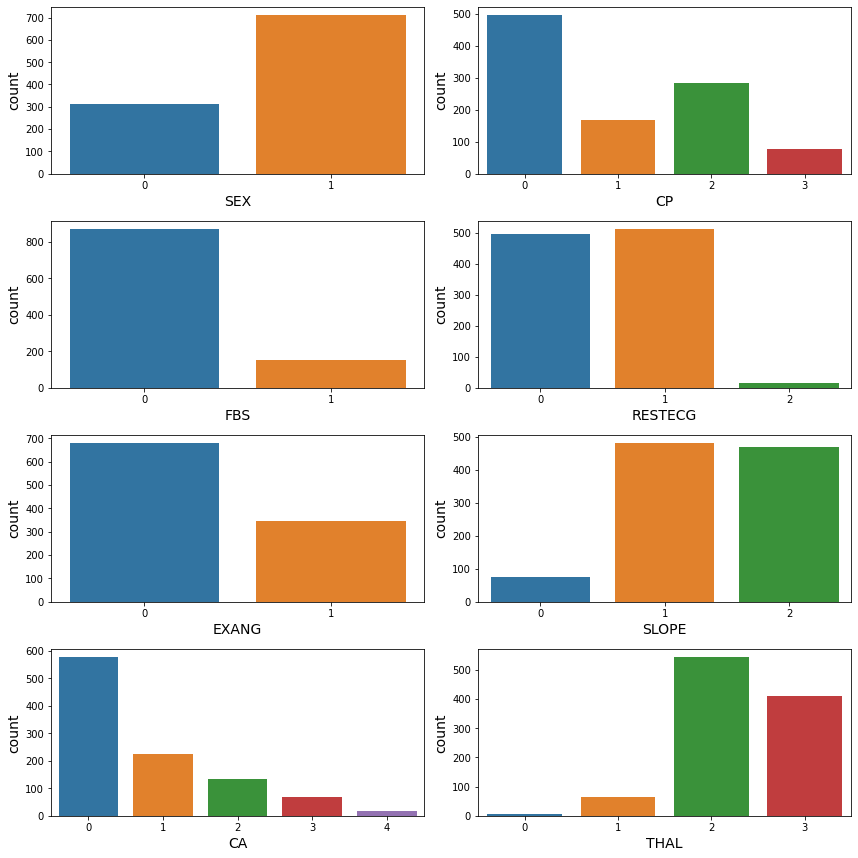

In [17]:
plt.figure(figsize=(12, 12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 2, index+1)
    sns.countplot(data=categorical_col, x=column)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad=1.0)
plt.show()

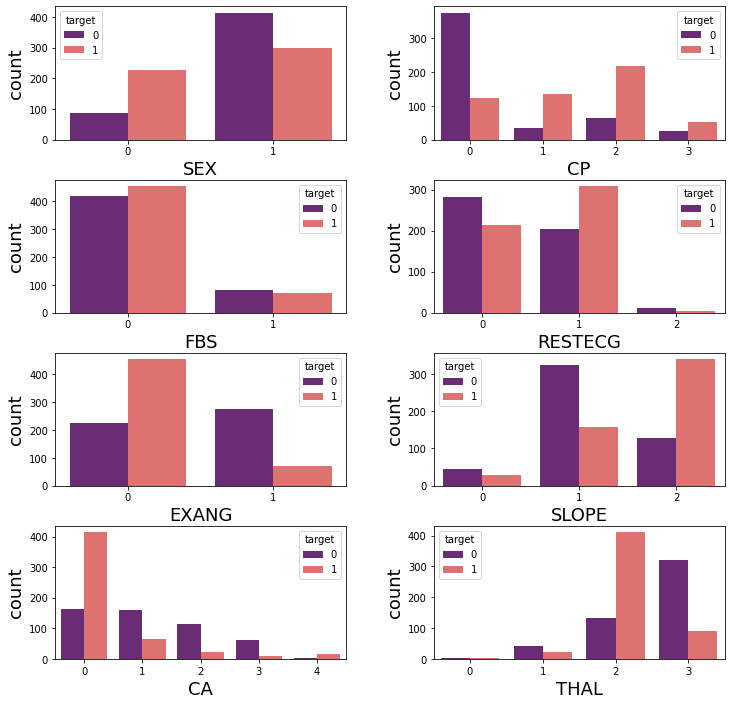

In [18]:
cat_cols = categorical_col.columns
fig = plt.figure(figsize=(12, 12))
for index in range(len(cat_cols)):
    if cat_cols[index] != "target":
        plt.subplot(4, 2, index+1)
        sns.countplot(data=categorical_col, x=cat_cols[index],
                      hue=dataframe["target"], palette="magma")
        plt.xlabel(cat_cols[index].upper(), fontsize=18)
        plt.ylabel("count", fontsize=18)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)

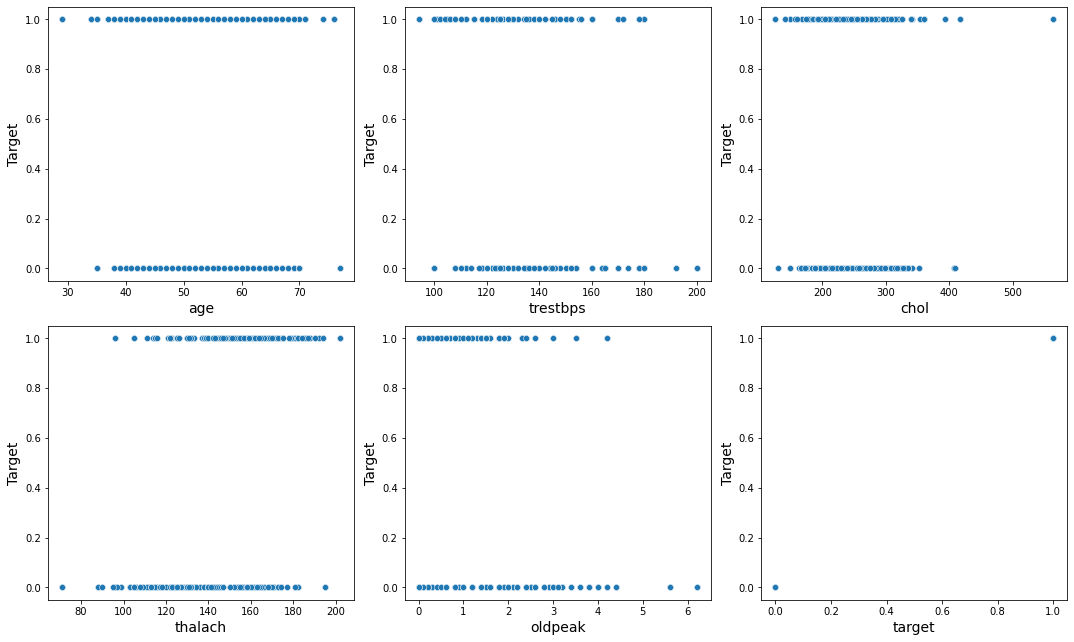

In [19]:
fig = plt.figure(figsize=(15, 9))
for index in range(len(numerical_col.columns)):
    plt.subplot(2, 3, index+1)
    sns.scatterplot(x=numerical_col.iloc[:, index],
                    y=dataframe.target, data=numerical_col)
    plt.xlabel(numerical_col.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad=1.0)

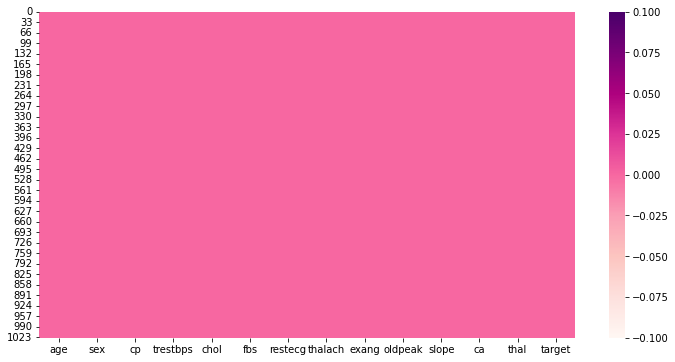

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataframe.isnull(), cmap="RdPu")
plt.show()

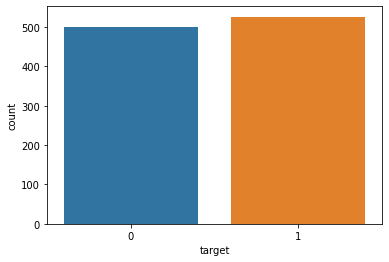

In [21]:
sns.countplot(data=dataframe, x="target")

In [22]:
dum_df = pd.get_dummies(dataframe, columns=["thal", "ca", "slope",
                                            "exang", "restecg",
                                            "fbs", "cp", "sex"],
                        drop_first=True)

In [23]:
dum_df.head()

,age,trestbps,chol,thalach,oldpeak,target,thal_1,thal_2,thal_3,ca_1,...,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1,cp_1,cp_2,cp_3,sex_1
0,52,125,212,168,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


In [24]:
X = dum_df.drop(["target"], axis=1)
y = dum_df["target"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

ANN Using Tensorflow

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=22, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 5,051
Trainable params: 5,051
Non-trainable params: 0
_________________________________________________________________


In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [33]:
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [34]:
model.fit(x=x_train, y=y_train, epochs=100, 
          validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 17ms/step - loss: 0.6139 - accuracy: 0.6756 - val_loss: 0.4971 - val_accuracy: 0.8000
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8659 - val_loss: 0.3920 - val_accuracy: 0.8146
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8817 - val_loss: 0.3532 - val_accuracy: 0.8244
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2708 - accuracy: 0.8927 - val_loss: 0.3295 - val_accuracy: 0.8244
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2433 - accuracy: 0.9073 - val_loss: 0.3127 - val_accuracy: 0.8537
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9195 - val_loss: 0.3006 - val_accuracy: 0.8488
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2056 - accuracy: 0.9232 - val_loss: 0.2831 - val_accuracy: 0.8585
Epoch 8/100


In [35]:
model_loss = pd.DataFrame(model.history.history)

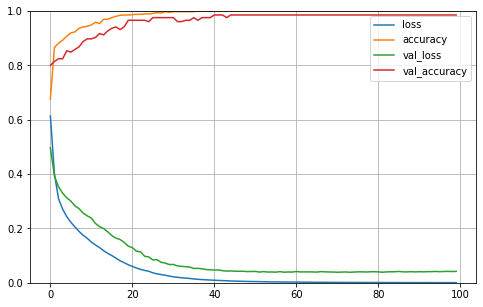

In [36]:
model_loss.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9854


[0.042066365480422974, 0.9853658676147461]